# End points 
- need autorization
- acess token
- username
- password 
- automate process 
 - splitter 
 - selinium

- end point without any end points
- register an app
- daily prices 
- historitical data 



291.3565597701148
291.35701130268166
292.46


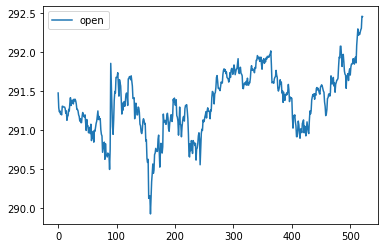

In [83]:
import requests
import pandas as pd
import time


#converts the current time into epoch time
#https://stackoverflow.com/questions/5998245/get-current-time-in-milliseconds-in-python
current_milli_time = lambda: int(round(time.time() * 1000))

#define end point 
endpoint = r"https://api.tdameritrade.com/v1/marketdata/{}/pricehistory".format('SPY')


payload = {
    'apikey' : 'KMNP0QEGBLRRU0JPEL9GYBNCVOCN3VXM',
    'periodType' : 'day',
    'frequencyType': 'minute',
    'frequency': '1',
    'period':'2',
    'endDate': current_milli_time(),
    'startDate': '1588924311000',
    'needExtendedHoursDate': 'false'}

#make a request

content = requests.get(url = endpoint, params = payload)

#convert it to a dictionary 
data = content.json()
data

mainData = data["candles"]
# dataKeys = data["candles"][0].keys()

chart = pd.DataFrame(mainData)
chart[["open"]].plot()
print(chart["open"].mean())
print(chart["close"].mean())
print(chart["open"].get(len(chart["close"])-1))




#x = [ mainData[i]['open'] for i in range(len(mainData))]




# Thing that i am going to need

- request 
    - to get the data from TD Ameritrade
- pandas
    - To put the data into a dataframe or series
- time 
    - to oragnaize time
    - to convert date.time objects into 13-digit epoch strings

1588944600000 1588975508144
291.6978305084743
291.7030842835127
293.33


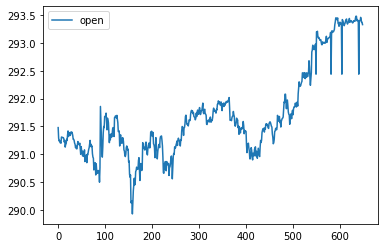

In [173]:
import requests
import pandas as pd
import time
import datetime
from datetime import datetime

def getEndPoint(ticker : str) -> str:
    ''' 0: a ticker symbol for stocks
        1: a request link with the ticker symbol inside of it
    '''
    return r"https://api.tdameritrade.com/v1/marketdata/{}/pricehistory".format(ticker.upper().strip())

def getCurrentTime() -> str:
    """
    0: None
    1: The current time in a 13-Digit epoch string
    
    """
    return lambda: int(round(time.time() * 1000))

# def DatetoEpoch(d: str ) ->str:
#     """
#     0:
#     1:
#     """
#     #return datetime.date(*(int(i) for i in d.split("-")))
#     return int(round(datetime.datetime(* [int(i) for i in d.split(("-"))] ).timestamp()))

def DatetoEpoch(d):
    return int(round(datetime.fromisoformat(d).timestamp() * 1000))

def EpochtoDate(d):
    """
    0: epoch with 13-digit
    1:
    """
    return datetime.fromtimestamp((d/1000)).strftime('%Y-%m-%d %H:%M:%S')

def GetAPIKey(path):
    return open(path, 'r')


    #return datetime.date(*(d.split("-")))
#def getPayLoad (**test) -> dict :
#This is an example for how to use keyword arguments for functions
# def test (*,keyword,cool):
#     return f'{keyword} is {cool}'



def setPayload(*, periodType, frequencyType, frequency, period,
               endDate, startDate, needExtendedHoursDate, apikey):
    payload = {
    'apikey' : apikey,
    'periodType' : periodType,
    'frequencyType': frequencyType,
    'frequency': frequency,
    'period':period,
    'endDate': endDate,
    'startDate': startDate,
    'needExtendedHoursDate': needExtendedHoursDate
    }
    return payload

    
    
    
    


if __name__ == "__main__":
#     pass
#     print(getCurrentTime()())
#     print(DatetoEpoch('2011-11-04 00:05:23.283'))
#     print(EpochtoDate(1320379523283))
    key = GetAPIKey('APIKEYI.txt')
    start = DatetoEpoch('2020-05-08 09:30:00.000')
    end = getCurrentTime()()
    print(start, end)
    payload = {
    'apikey' : key,
    'periodType' : 'day',
    'frequencyType': 'minute',
    'frequency': '1',
    'period':'2',
    'endDate': current_milli_time(),
    'startDate': '1588924311000',
    'needExtendedHoursDate': 'false'}
    
    #make a request

    content = requests.get(url = endpoint, params = payload)
    #convert it to a dictionary 
    data = content.json()
    #print(data["candles"])
    mainData = data["candles"]
# dataKeys = data["candles"][0].keys()

    chart = pd.DataFrame(mainData)
    chart[["open"]].plot()
    print(chart["open"].mean())
    print(chart["close"].mean())
    print(chart["open"].get(len(chart["close"])-1))

    
